# EDA 

Author: hshin337@gatech.edu  
Date: 1/31/2026  




## Findings

1. Use Ploymaket data  
    - Crypto Market interest indicator 
    - Before the year 2020, value set as 0.5

2. Incomplete category need to be reviewed  
    - `bitcoin|btc|crypto|eth|bsv|bch|ada|xrp` for market category classification
    - Before Crypto category count 340
    - After Crypto category count 48,752

3. How to interpret data as an indicator
    - Sentiment score [0, 1]
    - What else?



In [1]:
import os
from pathlib import Path
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from eda_starter_template import (
    load_bitcoin_data, 
    load_polymarket_data, 
    analyze_btc_metrics, 
    analyze_polymarket_summary, 
    plot_btc_price, 
    plot_polymarket_volume
)

# --- Configuration ---
# Robustly determine the project root directory
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
DATA_DIR = PROJECT_ROOT / "data"
PLOTS_DIR = SCRIPT_DIR / "plots"
COINMETRICS_PATH = DATA_DIR / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = DATA_DIR / "Polymarket"

print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09


## Ploymarket

In [2]:
dict_ploymarket = load_polymarket_data(POLYMARKET_DIR)
df_markets = dict_ploymarket['markets']
df_markets_summary = dict_ploymarket['summary']
df_markets_odds = dict_ploymarket['odds']
dict_ploymarket

Loading Polymarket data from C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09\data\Polymarket...
[Memory] Before loading Polymarket data: 211.48 MB
Loaded 78321 markets.
Loaded 2143181 odds history records.
Loaded 78321 summary records.
[Memory] After loading Polymarket data: 390.71 MB (Δ 179.23 MB)


{'markets': shape: (78_321, 10)
 ┌───────────┬────────────┬────────────┬────────────┬───┬────────┬────────┬────────────┬────────────┐
 │ market_id ┆ question   ┆ slug       ┆ event_slug ┆ … ┆ active ┆ closed ┆ created_at ┆ end_date   │
 │ ---       ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---    ┆ ---    ┆ ---        ┆ ---        │
 │ str       ┆ str        ┆ str        ┆ str        ┆   ┆ bool   ┆ bool   ┆ datetime[μ ┆ datetime[μ │
 │           ┆            ┆            ┆            ┆   ┆        ┆        ┆ s]         ┆ s]         │
 ╞═══════════╪════════════╪════════════╪════════════╪═══╪════════╪════════╪════════════╪════════════╡
 │ 242851    ┆ Will       ┆ will-bongb ┆ will-bongb ┆ … ┆ true   ┆ true   ┆ 2022-04-05 ┆ 2022-05-09 │
 │           ┆ Bongbong   ┆ ong-marcos ┆ ong-marcos ┆   ┆        ┆        ┆ 20:37:30   ┆ 00:00:00   │
 │           ┆ Marcos be  ┆ -be-electe ┆ -be-electe ┆   ┆        ┆        ┆            ┆            │
 │           ┆ electe…    ┆ …          ┆ …        

In [3]:
print(df_markets.columns, "\n\n",df_markets_summary.columns, "\n\n", df_markets_odds.columns)

['market_id', 'question', 'slug', 'event_slug', 'category', 'volume', 'active', 'closed', 'created_at', 'end_date'] 

 ['market_id', 'question', 'slug', 'volume', 'active', 'token_count', 'trade_count', 'first_trade', 'last_trade'] 

 ['market_id', 'token_id', 'timestamp', 'price']


In [4]:
# Count Crypto category before
print('Before Crypto category count', df_markets.filter(pl.col('category') == 'Crypto').height)

# Update category using Polars conditional logic
df_markets = df_markets.with_columns(
    pl.when(
        (pl.col('category').str.strip_chars() == '') &
        (pl.col('question').str.to_lowercase().str.contains(r'bitcoin|btc|crypto|eth|bsv|bch|ada|xrp'))
    ).then(pl.lit('Crypto'))
    .otherwise(pl.col('category'))
    .alias('category')
)

# Count Crypto category after
print('After Crypto category count', df_markets.filter(pl.col('category') == 'Crypto').height)

Before Crypto category count 340
After Crypto category count 48752


<Axes: title={'center': 'Number of Markets by Category'}, ylabel='category'>

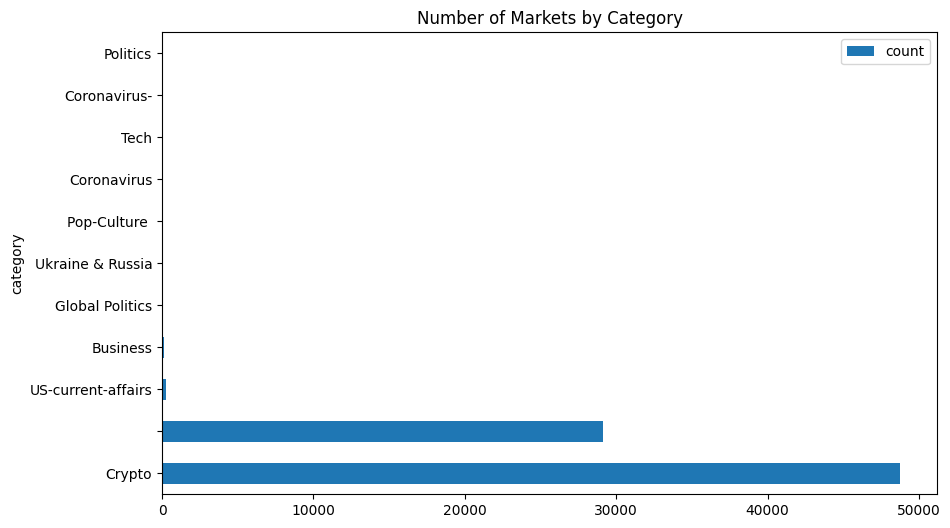

In [5]:
# plot bar chart
# df_markets.group_by('category').
# plot bar chart
df_markets.group_by('category').agg(pl.len().alias('count')).sort('count', descending=True).to_pandas().plot(x='category', y='count', kind='barh', title='Number of Markets by Category', figsize=(10, 6))

In [6]:
crypto_markets = df_markets.filter(pl.col('category') == 'Crypto').sort('created_at', descending=False)  
crypto_markets

market_id,question,slug,event_slug,category,volume,active,closed,created_at,end_date
str,str,str,str,str,f64,bool,bool,datetime[μs],datetime[μs]
"""36""","""What will the price of Bitcoin…","""what-will-the-price-of-bitcoin…","""what-will-the-price-of-bitcoin…","""Crypto""",59755.8,true,true,2020-10-02 20:00:04,2020-11-04 00:00:00
"""43""","""What will the total value lock…","""what-will-the-total-value-lock…","""what-will-the-total-value-lock…","""Crypto""",46944.58,true,true,2020-10-12 22:00:05,2021-01-02 00:00:00
"""44""","""What will the USD price of Fil…","""what-will-the-usd-price-of-fil…","""what-will-the-usd-price-of-fil…","""Crypto""",69947.1,true,true,2020-10-12 22:00:05,2020-11-17 00:00:00
"""57""","""Will Dharma’s Phase 1 Retroact…","""will-dharma-s-phase-1-retroact…","""will-dharma-s-phase-1-retroact…","""Crypto""",35661.94,true,true,2020-10-21 21:00:05,2020-10-31 00:00:00
"""63""","""Will BTC break $15k before 202…","""will-btc-break-15k-before-2021…","""will-btc-break-15k-before-2021…","""Crypto""",224706.49,true,true,2020-10-22 16:50:03,2021-01-01 00:00:00
…,…,…,…,…,…,…,…,…,…
"""905357""","""Ethereum Up or Down - December…","""eth-updown-15m-1765429200""","""eth-updown-15m-1765429200""","""Crypto""",0.0,true,false,2025-12-10 05:02:23,2025-12-11 05:15:00
"""905371""","""Bitcoin Up or Down - December …","""btc-updown-15m-1765430100""","""btc-updown-15m-1765430100""","""Crypto""",262.2,true,false,2025-12-10 05:17:20,2025-12-11 05:30:00
"""905374""","""Ethereum Up or Down - December…","""eth-updown-15m-1765430100""","""eth-updown-15m-1765430100""","""Crypto""",0.0,true,false,2025-12-10 05:17:26,2025-12-11 05:30:00


In [7]:
# get min and max dates of created_at
print('Start date', crypto_markets['created_at'].min(), '\nEnd data', crypto_markets['created_at'].max())

Start date 2020-10-02 20:00:04 
End data 2025-12-10 05:32:21


In [8]:
# Randomly sample 10 questions from crypto markets
sampled_questions = crypto_markets.select(['question', 'created_at', 'category']).sample(n=20)
print("Random 10 Crypto Market Questions:")
print("=" * 80)
for idx, row in enumerate(sampled_questions.to_pandas().itertuples(), 1):
    print(f"{idx:02d}. [{row.created_at.strftime('%Y-%m-%d')}] {row.question} ({row.category})")

Random 10 Crypto Market Questions:
01. [2025-11-12] Ethereum Up or Down - November 13, 6:15AM-6:30AM ET (Crypto)
02. [2025-11-21] Ethereum Up or Down - November 23, 7AM ET (Crypto)
03. [2025-08-21] Bitcoin above $110K on August 22? (Crypto)
04. [2025-10-27] Bitcoin Up or Down - October 27, 7:15PM-7:30PM ET (Crypto)
05. [2025-08-04] Ethereum Up or Down - August 6, 11PM ET (Crypto)
06. [2025-07-18] Bitcoin Up or Down on July 22? (Crypto)
07. [2025-11-22] Bitcoin Up or Down - November 23, 11:45AM-12:00PM ET (Crypto)
08. [2025-10-24] Bitcoin Up or Down - October 23, 11:15PM-11:30PM ET (Crypto)
09. [2025-08-21] Bitcoin Up or Down - August 23, 12AM ET (Crypto)
10. [2025-09-19] Will the price of XRP be between $2.97 and $3.00 on September 20 at 12AM ET? (Crypto)
11. [2025-11-18] Ethereum Up or Down - November 19, 10:00AM-10:15AM ET (Crypto)
12. [2025-08-25] Will Ethereum dip to $4000 August 25–31? (Crypto)
13. [2025-10-07] Bitcoin Up or Down - October 7, 11:15AM-11:30AM ET (Crypto)
14. [2025-

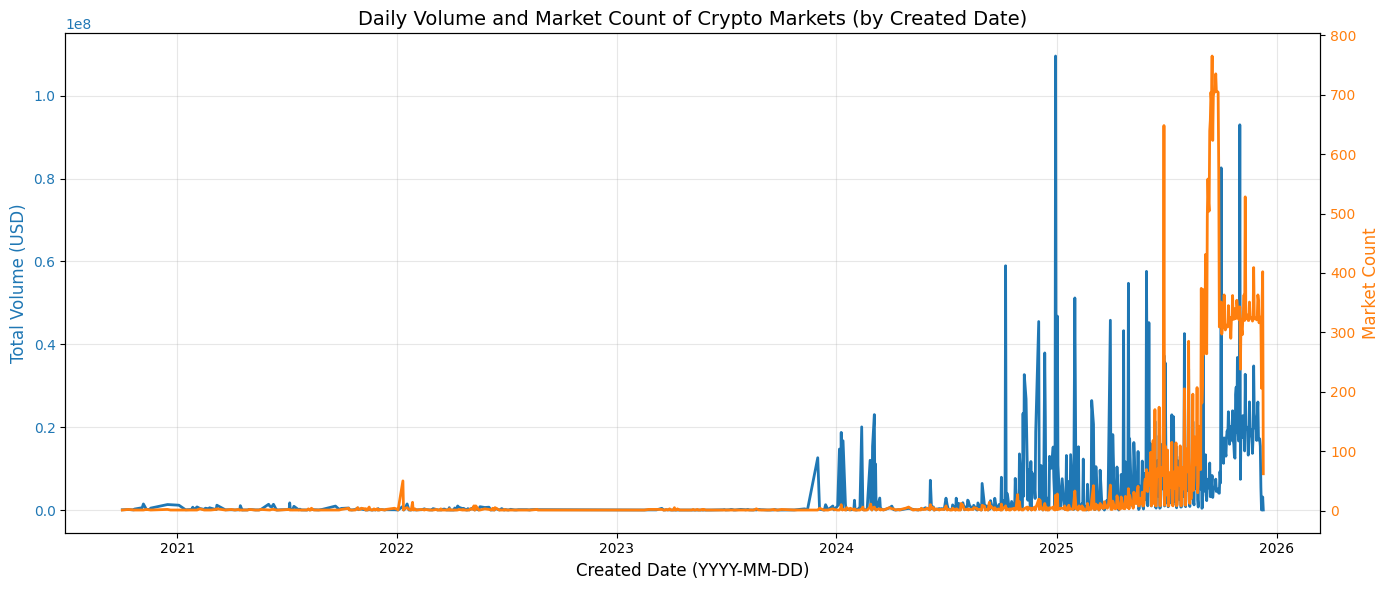

In [9]:
# Group crypto markets by created_at date and sum volume
crypto_daily_volume = (
    crypto_markets
    .with_columns(pl.col('created_at').cast(pl.Date).alias('date'))
    .group_by('date')
    .agg(pl.col('volume').sum().alias('daily_volume'), pl.col('market_id').count().alias('daily_market_count'))
    .sort('date')
)

# Plot with dual y-axis
plt.figure(figsize=(14, 6))
plot_data = crypto_daily_volume.to_pandas()

ax1 = plt.gca()
ax1.plot(plot_data['date'], plot_data['daily_volume'], color='tab:blue', linewidth=2, label='Daily Volume')
ax1.set_xlabel('Created Date (YYYY-MM-DD)', fontsize=12)
ax1.set_ylabel('Total Volume (USD)', fontsize=12, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(plot_data['date'], plot_data['daily_market_count'], color='tab:orange', linewidth=2, label='Daily Market Count')
ax2.set_ylabel('Market Count', fontsize=12, color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Daily Volume and Market Count of Crypto Markets (by Created Date)', fontsize=14)
ax1.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

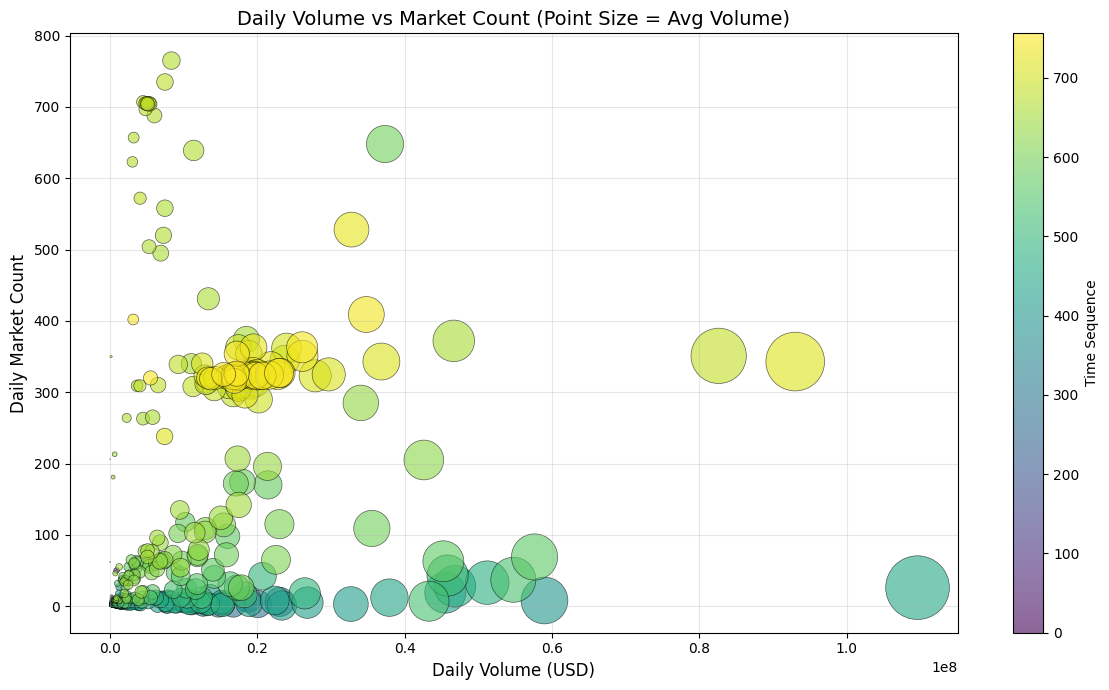

In [10]:
# Scatter plot: Volume vs Market Count with average volume as size
plt.figure(figsize=(12, 7))
plot_data = crypto_daily_volume.to_pandas()

# Calculate average volume per point for sizing
avg_volume_for_size = plot_data['daily_volume'].mean()
sizes = (plot_data['daily_volume'] / avg_volume_for_size) * 100  # Scale for visibility

plt.scatter(plot_data['daily_volume'], plot_data['daily_market_count'], 
           s=sizes, alpha=0.6, c=plot_data.index, cmap='viridis', edgecolors='black', linewidth=0.5)

plt.xlabel('Daily Volume (USD)', fontsize=12)
plt.ylabel('Daily Market Count', fontsize=12)
plt.title('Daily Volume vs Market Count (Point Size = Avg Volume)', fontsize=14)
plt.colorbar(label='Time Sequence')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
print(df_markets_summary.columns, "\n\n",df_markets_summary.dtypes)

['market_id', 'question', 'slug', 'volume', 'active', 'token_count', 'trade_count', 'first_trade', 'last_trade'] 

 [String, String, String, Float64, Boolean, Int64, Int64, Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None)]


In [12]:
# 243993
# df_markets_summary
df_markets_summary.filter(pl.col('market_id') == "798778")

market_id,question,slug,volume,active,token_count,trade_count,first_trade,last_trade
str,str,str,f64,bool,i64,i64,datetime[μs],datetime[μs]
"""798778""","""Will the price of Bitcoin be b…","""will-the-price-of-bitcoin-be-b…",8756.369075,true,2,279,1970-01-21 10:20:54.947,1970-01-21 10:21:24.701


In [13]:
# slug: "will-binancecom-become-insolvent-by-feb-28-2023"
_slug = "will-binancecom-become-insolvent-by-feb-28-2023"
df_markets_summary.filter(pl.col('slug') == _slug)

market_id,question,slug,volume,active,token_count,trade_count,first_trade,last_trade
str,str,str,f64,bool,i64,i64,datetime[μs],datetime[μs]
"""248453""","""Will Binance.com become insolv…","""will-binancecom-become-insolve…",269.41,true,2,0,null,null


In [14]:
# # market_id = 798778
# # df_markets_odds
# df_markets_odds.filter(pl.col('market_id') == "798778").to_pandas().groupby('token_id').agg({'price': 'mean'})
#     # .sort_values(by='timestamp').plot(x='timestamp', y='price', title='Market ID 798778 - Yes Price Over Time')

import polars as pl
import matplotlib.pyplot as plt

target_market_id = "798778"
plot_df = (
    df_markets_odds
    .filter(pl.col("market_id") == target_market_id)
    .sort("timestamp")
)
plot_df


market_id,token_id,timestamp,price
str,str,datetime[μs],f64
"""798778""","""432685633053019166815172962998…",1970-01-21 10:12:00.027,0.13
"""798778""","""171852042049250837298799352031…",1970-01-21 10:12:00.027,0.87
"""798778""","""432685633053019166815172962998…",1970-01-21 10:13:26.417,0.11
"""798778""","""171852042049250837298799352031…",1970-01-21 10:13:26.417,0.89
"""798778""","""171852042049250837298799352031…",1970-01-21 10:14:52.819,0.87
…,…,…,…
"""798778""","""432685633053019166815172962998…",1970-01-21 10:21:43.217,0.0005
"""798778""","""432685633053019166815172962998…",1970-01-21 10:21:46.814,0.0005
"""798778""","""171852042049250837298799352031…",1970-01-21 10:21:46.814,0.9995


In [15]:
print(df_markets_summary[0], "\n\n",df_markets_summary.columns, "\n\n", df_markets_summary.dtypes)

shape: (1, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ market_id ┆ question  ┆ slug      ┆ volume    ┆ … ┆ token_cou ┆ trade_cou ┆ first_tra ┆ last_tra │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ nt        ┆ nt        ┆ de        ┆ de       │
│ str       ┆ str       ┆ str       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ i64       ┆ i64       ┆ datetime[ ┆ datetime │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ μs]       ┆ [μs]     │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 798778    ┆ Will the  ┆ will-the- ┆ 8756.3690 ┆ … ┆ 2         ┆ 279       ┆ 1970-01-2 ┆ 1970-01- │
│           ┆ price of  ┆ price-of- ┆ 75        ┆   ┆           ┆           ┆ 1 10:20:5 ┆ 21 10:21 │
│           ┆ Bitcoin   ┆ bitcoin-b ┆           ┆   ┆           ┆           ┆

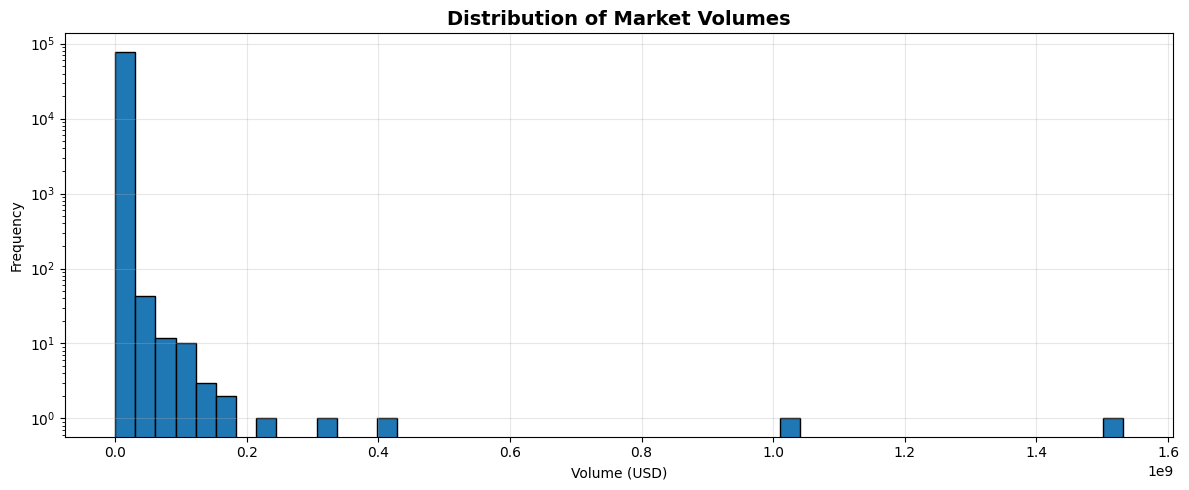

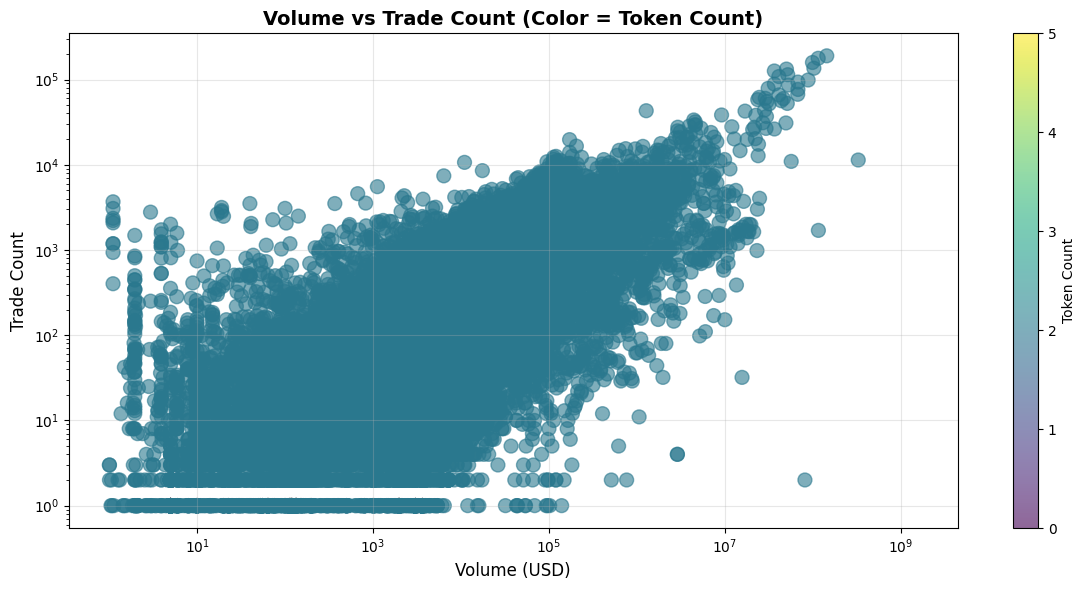

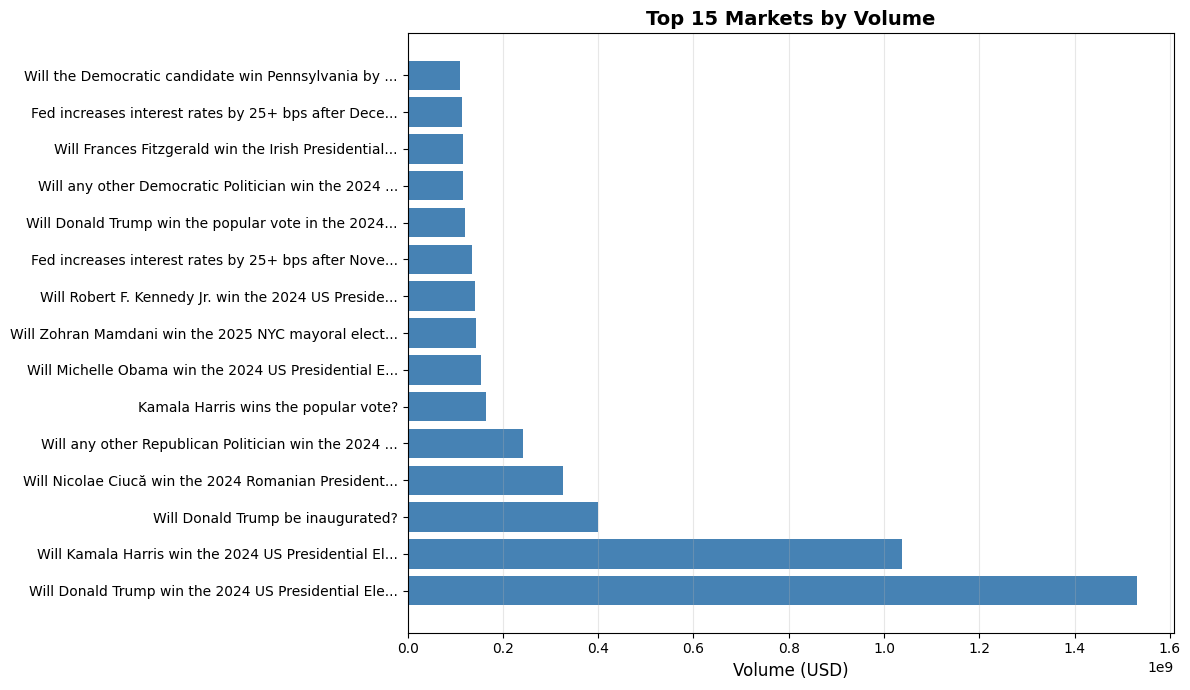

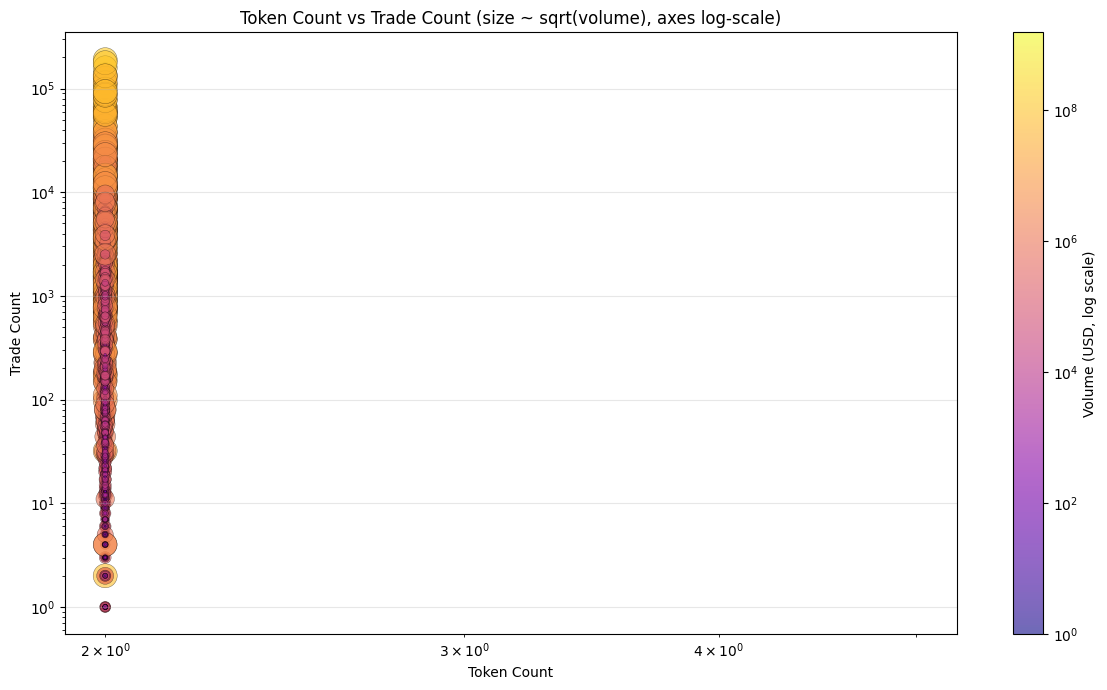

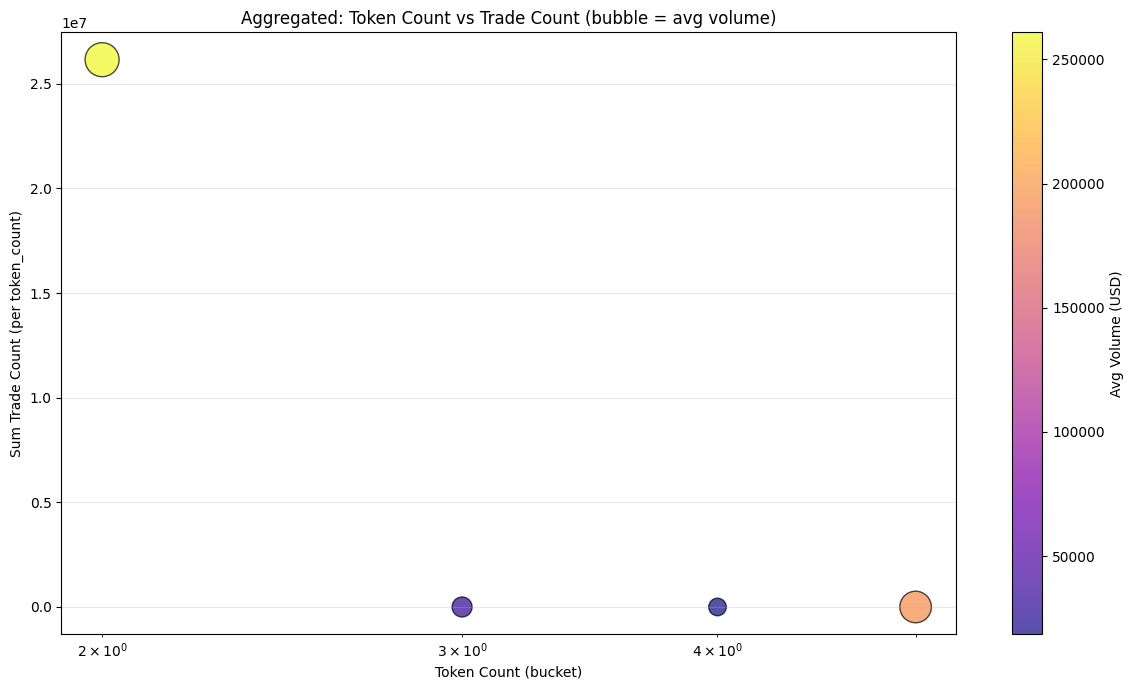

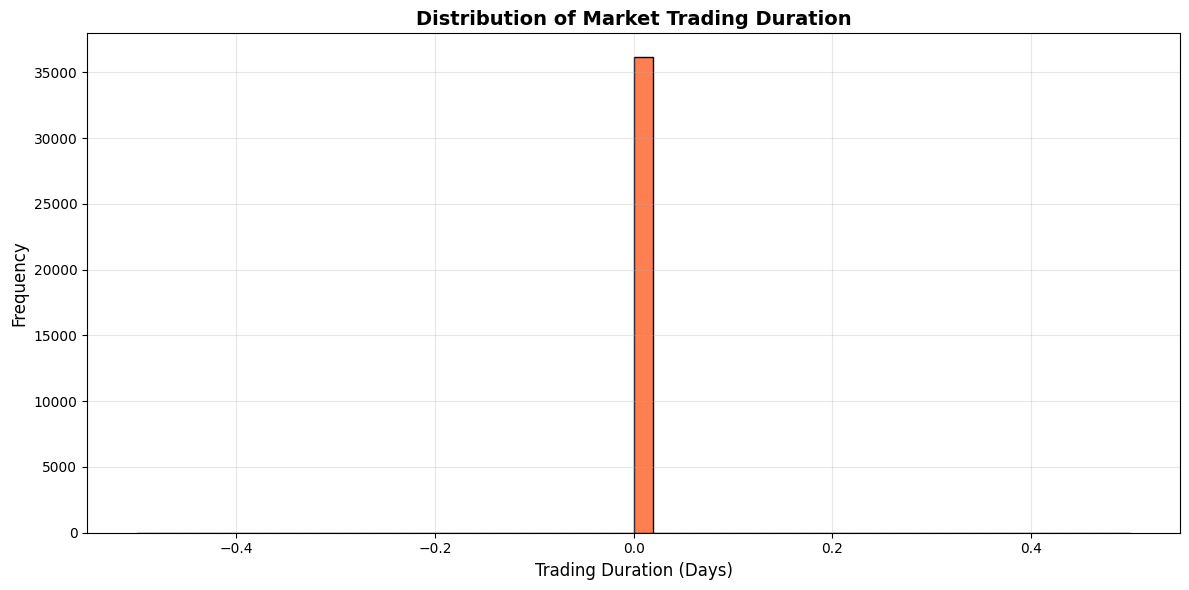

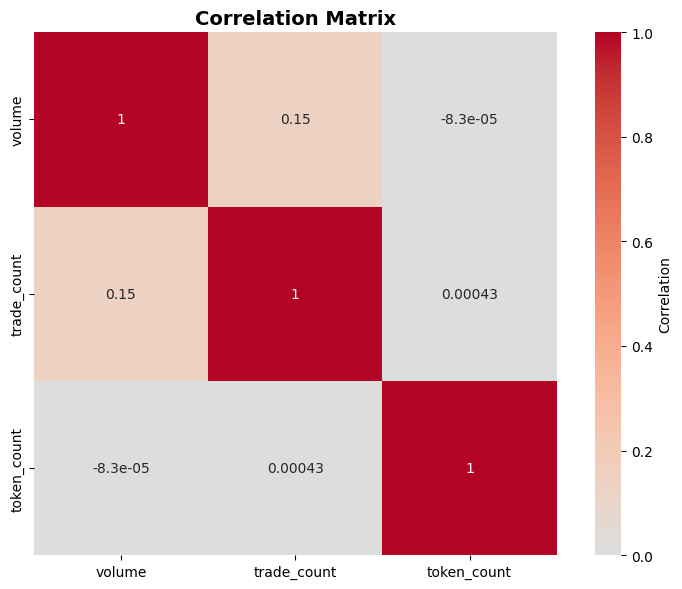

In [16]:
# 1. Volume Distribution
plt.figure(figsize=(12, 5))
df_markets_summary.to_pandas()['volume'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Market Volumes', fontsize=14, fontweight='bold')
plt.xlabel('Volume (USD)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Volume vs Trade Count  
plt.figure(figsize=(12, 6))
df_summary_pd = df_markets_summary.to_pandas()
plt.scatter(df_summary_pd['volume'], df_summary_pd['trade_count'], 
           alpha=0.6, s=100, c=df_summary_pd['token_count'], cmap='viridis')
plt.xlabel('Volume (USD)', fontsize=12)
plt.ylabel('Trade Count', fontsize=12)
plt.title('Volume vs Trade Count (Color = Token Count)', fontsize=14, fontweight='bold')
plt.colorbar(label='Token Count')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 4. Top 15 High Volume Markets
plt.figure(figsize=(12, 7))
top_markets = df_summary_pd.nlargest(15, 'volume')[['question', 'volume']]
plt.barh(range(len(top_markets)), top_markets['volume'].values, color='steelblue')
plt.yticks(range(len(top_markets)), 
          [q[:50] + '...' if len(q) > 50 else q for q in top_markets['question'].values])
plt.xlabel('Volume (USD)', fontsize=12)
plt.title('Top 15 Markets by Volume', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Token Count vs Trade Count 
import numpy as np
from matplotlib.colors import LogNorm

df_plot = df_summary_pd[df_summary_pd['volume'] > 0].copy()

vol_clip = df_plot['volume'].clip(upper=df_plot['volume'].quantile(0.99))

sizes = np.sqrt(vol_clip)
sizes = (sizes / sizes.max()) * 300  

plt.figure(figsize=(12,7))
sc = plt.scatter(df_plot['token_count'], df_plot['trade_count'],
                 s=sizes, c=df_plot['volume'], cmap='plasma',
                 norm=LogNorm(vmin=max(1, df_plot['volume'].min()), vmax=df_plot['volume'].max()),
                 alpha=0.6, edgecolors='k', linewidth=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Token Count')
plt.ylabel('Trade Count')
plt.title('Token Count vs Trade Count (size ~ sqrt(volume), axes log-scale)')
plt.colorbar(sc, label='Volume (USD, log scale)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

agg = df_plot.groupby('token_count').agg({
    'trade_count': 'sum',
    'volume': ['mean', 'sum', 'count']
})
agg.columns = ['trade_sum', 'vol_mean', 'vol_sum', 'n_markets']
agg = agg.reset_index()

# 크기: vol_mean 또는 vol_sum 사용
sizes = np.sqrt(agg['vol_mean'].clip(lower=1))
sizes = (sizes / sizes.max()) * 600

plt.figure(figsize=(12,7))
sc = plt.scatter(agg['token_count'], agg['trade_sum'],
                 s=sizes, c=agg['vol_mean'], cmap='plasma', alpha=0.7, edgecolor='k')
plt.xscale('log')
plt.xlabel('Token Count (bucket)')
plt.ylabel('Sum Trade Count (per token_count)')
plt.title('Aggregated: Token Count vs Trade Count (bubble = avg volume)')
plt.colorbar(sc, label='Avg Volume (USD)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. 거래 기간 분석 (Duration)
plt.figure(figsize=(12, 6))
df_summary_pd['duration_days'] = (df_summary_pd['last_trade'] - df_summary_pd['first_trade']).dt.days
plt.hist(df_summary_pd['duration_days'], bins=50, edgecolor='black', color='coral')
plt.xlabel('Trading Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Market Trading Duration', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Volume, Trade Count, Token Count 상관관계
import seaborn as sns
plt.figure(figsize=(8, 6))
corr_data = df_summary_pd[['volume', 'trade_count', 'token_count']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, square=True, 
           cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
analyze_polymarket_summary(dict_ploymarket)


--- Polymarket Data Summary ---
Total Markets: 78321
Active Markets: 78321
Closed Markets: 0
Total Volume: $18,203,500,864.53
Average Volume per Market: $232,421.71
Total Odds History Records: 2,143,181
Total Trades: 27,013,724


finance_politics_event_stats.parquet  

In [18]:
# markets_df = pl.scan_parquet(markets_path).collect()
fin_politics_event_stats_path = os.path.join(POLYMARKET_DIR, "finance_politics_event_stats.parquet" )
fin_pol_events = pl.scan_parquet(fin_politics_event_stats_path).collect()
fin_pol_events

event_slug,market_count,total_volume,first_market_start,last_market_end
str,i64,f64,datetime[μs],datetime[μs]
"""will-binancecom-become-insolve…",1,269.41,2023-01-24 21:09:31,2023-02-28 00:00:00
"""gme-market-cap-on-may-17""",7,112281.62,2024-05-13 17:51:35,2024-05-17 12:00:00
"""republican-vp-nominee""",25,9.2566e7,2024-01-18 19:14:19,2024-09-08 12:00:00
"""will-kevin-mccarthy-resign-fro…",1,6410.89,2023-11-12 19:11:54,2023-11-30 00:00:00
"""safe-market-cap-fdv-one-week-a…",6,116716.82,2024-03-26 17:01:59,2024-12-31 12:00:00
…,…,…,…,…
"""eth-updown-4h-1765429200""",1,0.0,2025-12-10 05:01:33,2025-12-11 09:00:00
"""sol-updown-4h-1765429200""",1,0.0,2025-12-10 05:01:33,2025-12-11 09:00:00
"""btc-updown-15m-1765431000""",1,267.31,2025-12-10 05:32:19,2025-12-11 05:45:00


In [19]:
fin_pol_events['event_slug'][0]

'will-binancecom-become-insolvent-by-feb-28-2023'

In [20]:
# polymarket_daily.groupby('category').agg({'volume_usd': 'sum', 'trade_count': 'sum'}).sort_values(by='volume_usd', ascending=False)
polymarket_daily

NameError: name 'polymarket_daily' is not defined

![df_markets](./plots/polymarket_volume_by_category.png)

In [ ]:
print("end of EDA")